## **INSERT DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


In [ ]:
merge = pd.read_csv("drive/MyDrive/SKRIPSI/dataset/coffee_feature_single_ori.csv")
color = pd.read_csv("drive/MyDrive/SKRIPSI/dataset/coffee_feature_single_ori_color.csv")
texture = pd.read_csv("drive/MyDrive/SKRIPSI/dataset/coffee_feature_single_ori_texture.csv")

In [ ]:
def feature_selection(x_train, y_train, x_test, fitur):
 fs = SelectKBest(score_func=mutual_info_classif, k=round(fitur/6))
 fs.fit(x_train, y_train)
 x_train_fs = fs.transform(x_train)
 x_test_fs = fs.transform(x_test)
 return x_train_fs, x_test_fs, fs

## **COLOR & TEXTURE**

### Pre-processing

In [ ]:
merge.head(10)

,Id,Violet_M,Violet_V,Violet_S,Violet_K,RoyalBlue_M,RoyalBlue_V,RoyalBlue_S,RoyalBlue_K,Blue_M,...,NIR15_Hom135,NIR15_Con0,NIR15_Con45,NIR15_Con90,NIR15_Con135,NIR15_En0,NIR15_En45,NIR15_En90,NIR15_En135,Label
0,0,5.96,1.42,0.39,-0.24,8.02,4.06,0.34,-0.52,8.99,...,0.33,11.03,13.87,10.26,11.89,0.07,0.07,0.07,0.07,dry
1,1,6.13,1.59,0.28,-0.40,8.21,4.70,0.28,-0.66,9.24,...,0.32,11.53,15.11,10.97,11.55,0.06,0.06,0.06,0.06,dry
2,2,5.87,1.67,1.38,6.15,7.77,4.83,1.43,6.54,8.65,...,0.31,15.12,16.57,11.62,16.20,0.06,0.05,0.06,0.05,dry
3,3,6.26,1.76,0.44,0.86,8.53,5.07,0.35,0.28,9.57,...,0.34,11.77,13.61,11.61,14.03,0.07,0.06,0.07,0.06,dry
4,4,5.98,1.36,0.28,-0.36,7.97,3.85,0.27,-0.60,8.86,...,0.30,14.32,15.57,10.23,14.21,0.07,0.07,0.07,0.06,dry
5,5,6.12,1.28,0.22,-0.33,8.31,3.66,0.18,-0.55,9.31,...,0.31,17.14,18.77,11.43,15.48,0.07,0.07,0.07,0.07,dry
6,6,6.44,1.57,0.44,-0.28,8.16,3.86,0.46,-0.43,8.92,...,0.20,59.50,58.62,35.53,59.50,0.04,0.04,0.04,0.04,dry
7,7,6.48,1.59,0.41,-0.32,8.25,4.07,0.45,-0.40,9.04,...,0.21,55.75,58.88,39.09,60.58,0.04,0.04,0.05,0.04,dry
8,8,6.35,1.44,0.43,-0.22,8.03,3.66,0.49,-0.27,8.78,...,0.20,62.83,61.57,36.90,62.69,0.04,0.04,0.04,0.04,dry
9,9,6.34,1.38,0.45,-0.07,8.08,3.47,0.42,-0.28,8.84,...,0.21,56.59,59.59,40.16,61.36,0.04,0.04,0.04,0.04,dry


In [ ]:
x_merge = merge.drop(["Id", "Label"], axis=1)
x_merge.head(10)

,Violet_M,Violet_V,Violet_S,Violet_K,RoyalBlue_M,RoyalBlue_V,RoyalBlue_S,RoyalBlue_K,Blue_M,Blue_V,...,NIR15_Hom90,NIR15_Hom135,NIR15_Con0,NIR15_Con45,NIR15_Con90,NIR15_Con135,NIR15_En0,NIR15_En45,NIR15_En90,NIR15_En135
0,5.96,1.42,0.39,-0.24,8.02,4.06,0.34,-0.52,8.99,6.21,...,0.39,0.33,11.03,13.87,10.26,11.89,0.07,0.07,0.07,0.07
1,6.13,1.59,0.28,-0.40,8.21,4.70,0.28,-0.66,9.24,7.13,...,0.35,0.32,11.53,15.11,10.97,11.55,0.06,0.06,0.06,0.06
2,5.87,1.67,1.38,6.15,7.77,4.83,1.43,6.54,8.65,7.38,...,0.35,0.31,15.12,16.57,11.62,16.20,0.06,0.05,0.06,0.05
3,6.26,1.76,0.44,0.86,8.53,5.07,0.35,0.28,9.57,7.51,...,0.36,0.34,11.77,13.61,11.61,14.03,0.07,0.06,0.07,0.06
4,5.98,1.36,0.28,-0.36,7.97,3.85,0.27,-0.60,8.86,5.69,...,0.36,0.30,14.32,15.57,10.23,14.21,0.07,0.07,0.07,0.06
5,6.12,1.28,0.22,-0.33,8.31,3.66,0.18,-0.55,9.31,5.60,...,0.36,0.31,17.14,18.77,11.43,15.48,0.07,0.07,0.07,0.07
6,6.44,1.57,0.44,-0.28,8.16,3.86,0.46,-0.43,8.92,4.99,...,0.25,0.20,59.50,58.62,35.53,59.50,0.04,0.04,0.04,0.04
7,6.48,1.59,0.41,-0.32,8.25,4.07,0.45,-0.40,9.04,5.42,...,0.25,0.21,55.75,58.88,39.09,60.58,0.04,0.04,0.05,0.04
8,6.35,1.44,0.43,-0.22,8.03,3.66,0.49,-0.27,8.78,4.78,...,0.24,0.20,62.83,61.57,36.90,62.69,0.04,0.04,0.04,0.04
9,6.34,1.38,0.45,-0.07,8.08,3.47,0.42,-0.28,8.84,4.58,...,0.25,0.21,56.59,59.59,40.16,61.36,0.04,0.04,0.04,0.04


In [ ]:
y_merge = merge["Label"]
y_merge.head(10)

0    dry
1    dry
2    dry
3    dry
4    dry
5    dry
6    dry
7    dry
8    dry
9    dry
Name: Label, dtype: object

### Model tanpa seleksi fitur

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_merge, y_merge, test_size = 0.3, random_state = 50)

In [ ]:
modelsvm = svm.SVC(kernel='linear')
svmtrain = modelsvm.fit(x_train, y_train)

In [ ]:
import pickle
pickle.dump(svmtrain, open("model.pkl", "wb"))

In [ ]:
x_train.shape, x_test.shape

((405, 300), (174, 300))

In [ ]:
Y_predict = svmtrain.predict(x_test)
print("Prediksi SVM : ",Y_predict)

Prediksi SVM :  ['semimature' 'mature' 'mature' 'dry' 'semimature' 'semimature'
 'semimature' 'overripe' 'inmature' 'mature' 'overripe' 'mature' 'mature'
 'semimature' 'mature' 'overripe' 'semimature' 'semimature' 'inmature'
 'overripe' 'mature' 'mature' 'semimature' 'inmature' 'overripe' 'mature'
 'inmature' 'inmature' 'inmature' 'mature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'mature' 'mature'
 'inmature' 'mature' 'mature' 'semimature' 'dry' 'mature' 'inmature'
 'semimature' 'semimature' 'semimature' 'inmature' 'inmature' 'overripe'
 'mature' 'mature' 'semimature' 'overripe' 'overripe' 'mature' 'inmature'
 'mature' 'inmature' 'inmature' 'mature' 'mature' 'semimature' 'overripe'
 'inmature' 'inmature' 'dry' 'mature' 'overripe' 'inmature' 'dry'
 'semimature' 'semimature' 'mature' 'mature' 'inmature' 'mature'
 'inmature' 'semimature' 'mature' 'semimature' 'inmature' 'mature'
 'overripe' 'mature' 'semimature' 'semimature' 'inmature' 'semimature'
 'i

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi SVM : ",accuracy)
print("Precision SVM : ",precision)
print("Recall SVM : ",recall)
print("F1-Score SVM : ",f1score)

Akurasi SVM :  0.9655172413793104
Precision SVM :  0.9584612406563625
Recall SVM :  0.966084721729883
F1-Score SVM :  0.9610979556243763


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       0.89      1.00      0.94        16
    inmature       0.97      0.97      0.97        35
      mature       0.98      0.98      0.98        52
    overripe       1.00      0.90      0.95        31
  semimature       0.95      0.97      0.96        40

    accuracy                           0.97       174
   macro avg       0.96      0.97      0.96       174
weighted avg       0.97      0.97      0.97       174



### Model dengan seleksi fitur

In [ ]:
x_train_fs, x_test_fs, fs = feature_selection(x_train, y_train, x_test, x_train.shape[1])
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Fitur','Score'] 
print(featureScores.nlargest(20,'Score'))
# print(mean)

               Fitur     Score
24            Lime_M  0.909064
33           Amber_V  0.828422
222        Red_Cor90  0.822192
40             Red_M  0.807683
206  RedOrange_Cor90  0.804487
52           NIR14_M  0.799649
28          Yellow_M  0.789150
48          FarRed_M  0.787619
238    DeepRed_Cor90  0.777359
25            Lime_V  0.775347
157       Lime_Cor45  0.774550
41             Red_V  0.772445
32           Amber_M  0.771272
158       Lime_Cor90  0.767994
190      Amber_Cor90  0.761831
37       RedOrange_V  0.760287
45         DeepRed_V  0.760130
36       RedOrange_M  0.759829
29          Yellow_V  0.756019
174     Yellow_Cor90  0.726233


In [ ]:
modelsvm = svm.SVC(kernel='linear')
svmtrain = modelsvm.fit(x_train_fs, y_train)

In [ ]:
x_train_fs.shape, x_test_fs.shape

((405, 50), (174, 50))

In [ ]:
Y_predict = svmtrain.predict(x_test_fs)
print("Prediksi SVM : ",Y_predict)

Prediksi SVM :  ['mature' 'mature' 'mature' 'overripe' 'semimature' 'semimature'
 'semimature' 'overripe' 'inmature' 'mature' 'overripe' 'mature' 'mature'
 'semimature' 'mature' 'dry' 'semimature' 'semimature' 'inmature'
 'overripe' 'mature' 'mature' 'semimature' 'inmature' 'overripe' 'mature'
 'inmature' 'inmature' 'inmature' 'mature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'inmature'
 'mature' 'inmature' 'mature' 'mature' 'semimature' 'dry' 'mature'
 'inmature' 'semimature' 'semimature' 'semimature' 'inmature' 'inmature'
 'overripe' 'semimature' 'mature' 'semimature' 'overripe' 'overripe'
 'mature' 'inmature' 'mature' 'inmature' 'inmature' 'mature' 'mature'
 'semimature' 'overripe' 'inmature' 'inmature' 'dry' 'mature' 'overripe'
 'inmature' 'dry' 'semimature' 'semimature' 'mature' 'mature' 'inmature'
 'mature' 'inmature' 'semimature' 'mature' 'semimature' 'inmature'
 'mature' 'dry' 'mature' 'semimature' 'semimature' 'inmature' 'semimature'
 'inma

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi SVM : ",accuracy)
print("Precision SVM : ",precision)
print("Recall SVM : ",recall)
print("F1-Score SVM : ",f1score)

Akurasi SVM :  0.9425287356321839
Precision SVM :  0.9297586726998492
Recall SVM :  0.9390242821694434
F1-Score SVM :  0.9336891857461225


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       0.83      0.94      0.88        16
    inmature       0.97      0.94      0.96        35
      mature       0.96      0.96      0.96        52
    overripe       0.93      0.90      0.92        31
  semimature       0.95      0.95      0.95        40

    accuracy                           0.94       174
   macro avg       0.93      0.94      0.93       174
weighted avg       0.94      0.94      0.94       174



## **COLOR**

### Pre-Processing

In [ ]:
color.head(10)

,Id,Violet_M,Violet_V,Violet_S,Violet_K,RoyalBlue_M,RoyalBlue_V,RoyalBlue_S,RoyalBlue_K,Blue_M,...,FarRed_K,NIR14_M,NIR14_V,NIR14_S,NIR14_K,NIR15_M,NIR15_V,NIR15_S,NIR15_K,Label
0,0,5.96,1.42,0.39,-0.24,8.02,4.06,0.34,-0.52,8.99,...,-1.17,121.09,341.38,-0.07,-1.13,69.81,59.71,-0.54,-0.56,dry
1,1,6.13,1.59,0.28,-0.40,8.21,4.70,0.28,-0.66,9.24,...,-1.33,119.24,437.42,0.05,-1.33,69.05,76.09,-0.46,-0.84,dry
2,2,5.87,1.67,1.38,6.15,7.77,4.83,1.43,6.54,8.65,...,-1.39,117.04,538.51,0.18,-1.41,68.16,100.11,-0.39,-0.86,dry
3,3,6.26,1.76,0.44,0.86,8.53,5.07,0.35,0.28,9.57,...,-1.08,125.32,495.87,-0.38,-1.07,71.47,91.50,-0.86,-0.05,dry
4,4,5.98,1.36,0.28,-0.36,7.97,3.85,0.27,-0.60,8.86,...,-0.89,121.24,347.21,-0.23,-0.93,70.01,59.24,-0.59,-0.62,dry
5,5,6.12,1.28,0.22,-0.33,8.31,3.66,0.18,-0.55,9.31,...,-0.81,121.85,312.76,-0.27,-0.79,69.78,63.27,-0.68,-0.42,dry
6,6,6.44,1.57,0.44,-0.28,8.16,3.86,0.46,-0.43,8.92,...,-1.61,98.46,1233.97,-0.18,-1.38,56.94,318.92,-0.53,-0.97,dry
7,7,6.48,1.59,0.41,-0.32,8.25,4.07,0.45,-0.40,9.04,...,-1.58,100.94,1219.04,-0.31,-1.34,58.11,311.37,-0.65,-0.84,dry
8,8,6.35,1.44,0.43,-0.22,8.03,3.66,0.49,-0.27,8.78,...,-1.61,96.08,1189.31,-0.11,-1.39,55.84,311.96,-0.48,-1.02,dry
9,9,6.34,1.38,0.45,-0.07,8.08,3.47,0.42,-0.28,8.84,...,-1.58,101.40,1263.53,-0.27,-1.35,58.42,322.05,-0.62,-0.87,dry


In [ ]:
x_color = color.drop(["Id", "Label"], axis=1)
x_color.head(10)

,Violet_M,Violet_V,Violet_S,Violet_K,RoyalBlue_M,RoyalBlue_V,RoyalBlue_S,RoyalBlue_K,Blue_M,Blue_V,...,FarRed_S,FarRed_K,NIR14_M,NIR14_V,NIR14_S,NIR14_K,NIR15_M,NIR15_V,NIR15_S,NIR15_K
0,5.96,1.42,0.39,-0.24,8.02,4.06,0.34,-0.52,8.99,6.21,...,-0.00,-1.17,121.09,341.38,-0.07,-1.13,69.81,59.71,-0.54,-0.56
1,6.13,1.59,0.28,-0.40,8.21,4.70,0.28,-0.66,9.24,7.13,...,0.05,-1.33,119.24,437.42,0.05,-1.33,69.05,76.09,-0.46,-0.84
2,5.87,1.67,1.38,6.15,7.77,4.83,1.43,6.54,8.65,7.38,...,0.13,-1.39,117.04,538.51,0.18,-1.41,68.16,100.11,-0.39,-0.86
3,6.26,1.76,0.44,0.86,8.53,5.07,0.35,0.28,9.57,7.51,...,-0.33,-1.08,125.32,495.87,-0.38,-1.07,71.47,91.50,-0.86,-0.05
4,5.98,1.36,0.28,-0.36,7.97,3.85,0.27,-0.60,8.86,5.69,...,-0.21,-0.89,121.24,347.21,-0.23,-0.93,70.01,59.24,-0.59,-0.62
5,6.12,1.28,0.22,-0.33,8.31,3.66,0.18,-0.55,9.31,5.60,...,-0.14,-0.81,121.85,312.76,-0.27,-0.79,69.78,63.27,-0.68,-0.42
6,6.44,1.57,0.44,-0.28,8.16,3.86,0.46,-0.43,8.92,4.99,...,-0.08,-1.61,98.46,1233.97,-0.18,-1.38,56.94,318.92,-0.53,-0.97
7,6.48,1.59,0.41,-0.32,8.25,4.07,0.45,-0.40,9.04,5.42,...,-0.21,-1.58,100.94,1219.04,-0.31,-1.34,58.11,311.37,-0.65,-0.84
8,6.35,1.44,0.43,-0.22,8.03,3.66,0.49,-0.27,8.78,4.78,...,-0.00,-1.61,96.08,1189.31,-0.11,-1.39,55.84,311.96,-0.48,-1.02
9,6.34,1.38,0.45,-0.07,8.08,3.47,0.42,-0.28,8.84,4.58,...,-0.20,-1.58,101.40,1263.53,-0.27,-1.35,58.42,322.05,-0.62,-0.87


In [ ]:
y_color = color["Label"]
y_color.head(10)

0    dry
1    dry
2    dry
3    dry
4    dry
5    dry
6    dry
7    dry
8    dry
9    dry
Name: Label, dtype: object

### Model tanpa seleksi fitur

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_color, y_color, test_size = 0.3, random_state = 50)

In [ ]:
modelsvm = svm.SVC(kernel='linear')
svmtrain = modelsvm.fit(x_train, y_train)

In [ ]:
x_train.shape, x_test.shape

((405, 60), (174, 60))

In [ ]:
Y_predict = svmtrain.predict(x_test)
print("Prediksi SVM : ",Y_predict)

Prediksi SVM :  ['semimature' 'mature' 'mature' 'overripe' 'semimature' 'semimature'
 'semimature' 'overripe' 'inmature' 'mature' 'overripe' 'mature' 'mature'
 'semimature' 'mature' 'overripe' 'semimature' 'semimature' 'inmature'
 'overripe' 'mature' 'mature' 'semimature' 'inmature' 'mature' 'mature'
 'inmature' 'inmature' 'inmature' 'mature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'mature' 'mature'
 'inmature' 'mature' 'mature' 'semimature' 'dry' 'mature' 'inmature'
 'semimature' 'semimature' 'semimature' 'inmature' 'inmature' 'overripe'
 'semimature' 'mature' 'mature' 'overripe' 'overripe' 'mature' 'inmature'
 'mature' 'inmature' 'inmature' 'mature' 'mature' 'semimature' 'overripe'
 'inmature' 'inmature' 'dry' 'mature' 'overripe' 'inmature' 'dry'
 'semimature' 'semimature' 'mature' 'mature' 'inmature' 'mature'
 'inmature' 'semimature' 'mature' 'semimature' 'inmature' 'mature'
 'overripe' 'mature' 'semimature' 'semimature' 'inmature' 'semimature'


In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi SVM : ",accuracy)
print("Precision SVM : ",precision)
print("Recall SVM : ",recall)
print("F1-Score SVM : ",f1score)

Akurasi SVM :  0.9425287356321839
Precision SVM :  0.9363860122003121
Recall SVM :  0.9457869549805034
F1-Score SVM :  0.9388259441707717


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       0.84      1.00      0.91        16
    inmature       0.97      0.97      0.97        35
      mature       0.94      0.96      0.95        52
    overripe       1.00      0.87      0.93        31
  semimature       0.93      0.93      0.93        40

    accuracy                           0.94       174
   macro avg       0.94      0.95      0.94       174
weighted avg       0.95      0.94      0.94       174



### Model dengan seleksi fitur

Feature 0: 0.222501
Feature 1: 0.402507
Feature 2: 0.411570
Feature 3: 0.421154
Feature 4: 0.298110
Feature 5: 0.457858
Feature 6: 0.308625
Feature 7: 0.361249
Feature 8: 0.402991
Feature 9: 0.494296
Feature 10: 0.280312
Feature 11: 0.357697
Feature 12: 0.411348
Feature 13: 0.544603
Feature 14: 0.387050
Feature 15: 0.428976
Feature 16: 0.419107
Feature 17: 0.439820
Feature 18: 0.422984
Feature 19: 0.408075
Feature 20: 0.641629
Feature 21: 0.649927
Feature 22: 0.474554
Feature 23: 0.471717
Feature 24: 0.904516
Feature 25: 0.774812
Feature 26: 0.574529
Feature 27: 0.383075
Feature 28: 0.797278
Feature 29: 0.761133
Feature 30: 0.431100
Feature 31: 0.493130
Feature 32: 0.763284
Feature 33: 0.827658
Feature 34: 0.374018
Feature 35: 0.524269
Feature 36: 0.761041
Feature 37: 0.760287
Feature 38: 0.498158
Feature 39: 0.595055
Feature 40: 0.810928
Feature 41: 0.774521
Feature 42: 0.373156
Feature 43: 0.582350
Feature 44: 0.714228
Feature 45: 0.756883
Feature 46: 0.150273
Feature 47: 0.416551
Fe

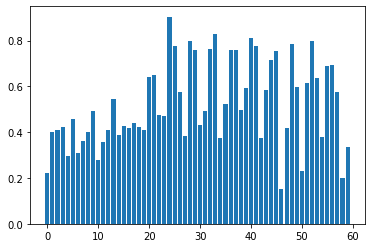

In [ ]:
x_train_fs, x_test_fs, fs = feature_selection(x_train, y_train, x_test, x_train.shape[1])
# print(fs.score_)
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
modelsvm = svm.SVC(kernel='linear')
svmtrain = modelsvm.fit(x_train_fs, y_train)

In [ ]:
x_train_fs.shape, x_test_fs.shape

((405, 10), (174, 10))

In [ ]:
Y_predict = svmtrain.predict(x_test_fs)
print("Prediksi SVM : ",Y_predict)

Prediksi SVM :  ['mature' 'mature' 'mature' 'overripe' 'semimature' 'semimature'
 'semimature' 'overripe' 'inmature' 'mature' 'overripe' 'mature' 'mature'
 'semimature' 'mature' 'overripe' 'semimature' 'semimature' 'inmature'
 'overripe' 'mature' 'mature' 'semimature' 'inmature' 'overripe' 'mature'
 'inmature' 'inmature' 'inmature' 'mature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'mature' 'mature'
 'inmature' 'mature' 'mature' 'semimature' 'dry' 'mature' 'inmature'
 'semimature' 'semimature' 'semimature' 'inmature' 'inmature' 'overripe'
 'semimature' 'mature' 'semimature' 'overripe' 'overripe' 'mature'
 'inmature' 'mature' 'inmature' 'inmature' 'mature' 'mature' 'mature'
 'overripe' 'inmature' 'inmature' 'dry' 'mature' 'overripe' 'inmature'
 'dry' 'semimature' 'semimature' 'mature' 'mature' 'inmature' 'mature'
 'inmature' 'semimature' 'mature' 'semimature' 'inmature' 'mature'
 'overripe' 'mature' 'semimature' 'semimature' 'inmature' 'semimature'
 '

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi SVM : ",accuracy)
print("Precision SVM : ",precision)
print("Recall SVM : ",recall)
print("F1-Score SVM : ",f1score)

Akurasi SVM :  0.9597701149425287
Precision SVM :  0.9562006128043864
Recall SVM :  0.9651417936901808
F1-Score SVM :  0.9598760174965083


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       0.89      1.00      0.94        16
    inmature       1.00      0.97      0.99        35
      mature       0.94      0.96      0.95        52
    overripe       1.00      0.97      0.98        31
  semimature       0.95      0.93      0.94        40

    accuracy                           0.96       174
   macro avg       0.96      0.97      0.96       174
weighted avg       0.96      0.96      0.96       174



## **TEXTURE**

### Pre-Processing

In [ ]:
texture.head(10)

,Id,Violet_Cor0,Violet_Cor45,Violet_Cor90,Violet_Cor135,Violet_Hom0,Violet_Hom45,Violet_Hom90,Violet_Hom135,Violet_Con0,...,NIR15_Hom135,NIR15_Con0,NIR15_Con45,NIR15_Con90,NIR15_Con135,NIR15_En0,NIR15_En45,NIR15_En90,NIR15_En135,Label
0,0,0.60,0.56,0.58,0.58,0.66,0.64,0.65,0.64,1.13,...,0.33,11.03,13.87,10.26,11.89,0.07,0.07,0.07,0.07,dry
1,1,0.65,0.60,0.61,0.62,0.66,0.64,0.65,0.64,1.11,...,0.32,11.53,15.11,10.97,11.55,0.06,0.06,0.06,0.06,dry
2,2,0.60,0.54,0.54,0.51,0.67,0.65,0.66,0.65,1.32,...,0.31,15.12,16.57,11.62,16.20,0.06,0.05,0.06,0.05,dry
3,3,0.62,0.59,0.59,0.59,0.64,0.63,0.63,0.63,1.33,...,0.34,11.77,13.61,11.61,14.03,0.07,0.06,0.07,0.06,dry
4,4,0.60,0.58,0.57,0.55,0.66,0.65,0.65,0.64,1.07,...,0.30,14.32,15.57,10.23,14.21,0.07,0.07,0.07,0.06,dry
5,5,0.56,0.54,0.55,0.52,0.65,0.65,0.65,0.64,1.13,...,0.31,17.14,18.77,11.43,15.48,0.07,0.07,0.07,0.07,dry
6,6,0.62,0.61,0.62,0.59,0.65,0.64,0.65,0.64,1.17,...,0.20,59.50,58.62,35.53,59.50,0.04,0.04,0.04,0.04,dry
7,7,0.62,0.61,0.61,0.59,0.64,0.64,0.64,0.63,1.21,...,0.21,55.75,58.88,39.09,60.58,0.04,0.04,0.05,0.04,dry
8,8,0.58,0.57,0.57,0.53,0.64,0.64,0.64,0.63,1.18,...,0.20,62.83,61.57,36.90,62.69,0.04,0.04,0.04,0.04,dry
9,9,0.57,0.56,0.57,0.54,0.65,0.64,0.65,0.63,1.17,...,0.21,56.59,59.59,40.16,61.36,0.04,0.04,0.04,0.04,dry


In [ ]:
x_texture = texture.drop(["Id", "Label"], axis=1)
x_texture.head(10)

,Violet_Cor0,Violet_Cor45,Violet_Cor90,Violet_Cor135,Violet_Hom0,Violet_Hom45,Violet_Hom90,Violet_Hom135,Violet_Con0,Violet_Con45,...,NIR15_Hom90,NIR15_Hom135,NIR15_Con0,NIR15_Con45,NIR15_Con90,NIR15_Con135,NIR15_En0,NIR15_En45,NIR15_En90,NIR15_En135
0,0.60,0.56,0.58,0.58,0.66,0.64,0.65,0.64,1.13,1.24,...,0.39,0.33,11.03,13.87,10.26,11.89,0.07,0.07,0.07,0.07
1,0.65,0.60,0.61,0.62,0.66,0.64,0.65,0.64,1.11,1.25,...,0.35,0.32,11.53,15.11,10.97,11.55,0.06,0.06,0.06,0.06
2,0.60,0.54,0.54,0.51,0.67,0.65,0.66,0.65,1.32,1.56,...,0.35,0.31,15.12,16.57,11.62,16.20,0.06,0.05,0.06,0.05
3,0.62,0.59,0.59,0.59,0.64,0.63,0.63,0.63,1.33,1.45,...,0.36,0.34,11.77,13.61,11.61,14.03,0.07,0.06,0.07,0.06
4,0.60,0.58,0.57,0.55,0.66,0.65,0.65,0.64,1.07,1.13,...,0.36,0.30,14.32,15.57,10.23,14.21,0.07,0.07,0.07,0.06
5,0.56,0.54,0.55,0.52,0.65,0.65,0.65,0.64,1.13,1.18,...,0.36,0.31,17.14,18.77,11.43,15.48,0.07,0.07,0.07,0.07
6,0.62,0.61,0.62,0.59,0.65,0.64,0.65,0.64,1.17,1.17,...,0.25,0.20,59.50,58.62,35.53,59.50,0.04,0.04,0.04,0.04
7,0.62,0.61,0.61,0.59,0.64,0.64,0.64,0.63,1.21,1.20,...,0.25,0.21,55.75,58.88,39.09,60.58,0.04,0.04,0.05,0.04
8,0.58,0.57,0.57,0.53,0.64,0.64,0.64,0.63,1.18,1.19,...,0.24,0.20,62.83,61.57,36.90,62.69,0.04,0.04,0.04,0.04
9,0.57,0.56,0.57,0.54,0.65,0.64,0.65,0.63,1.17,1.16,...,0.25,0.21,56.59,59.59,40.16,61.36,0.04,0.04,0.04,0.04


In [ ]:
y_texture = texture["Label"]
y_texture.head(10)

0    dry
1    dry
2    dry
3    dry
4    dry
5    dry
6    dry
7    dry
8    dry
9    dry
Name: Label, dtype: object

### Model tanpa seleksi fitur

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_texture, y_texture, test_size = 0.3, random_state = 50)

In [ ]:
modelsvm = svm.SVC(kernel='linear')
svmtrain = modelsvm.fit(x_train, y_train)

In [ ]:
x_train.shape, x_test.shape

((405, 240), (174, 240))

In [ ]:
Y_predict = svmtrain.predict(x_test)
print("Prediksi SVM : ",Y_predict)

Prediksi SVM :  ['semimature' 'mature' 'mature' 'dry' 'semimature' 'semimature'
 'semimature' 'overripe' 'inmature' 'mature' 'overripe' 'mature' 'mature'
 'semimature' 'mature' 'overripe' 'semimature' 'semimature' 'inmature'
 'overripe' 'mature' 'mature' 'semimature' 'inmature' 'overripe' 'mature'
 'inmature' 'inmature' 'inmature' 'semimature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'mature' 'mature'
 'inmature' 'semimature' 'mature' 'semimature' 'dry' 'mature' 'inmature'
 'semimature' 'semimature' 'semimature' 'inmature' 'inmature' 'overripe'
 'mature' 'mature' 'semimature' 'overripe' 'overripe' 'mature' 'inmature'
 'overripe' 'inmature' 'inmature' 'mature' 'mature' 'semimature'
 'overripe' 'inmature' 'inmature' 'dry' 'semimature' 'overripe' 'inmature'
 'dry' 'semimature' 'inmature' 'mature' 'mature' 'inmature' 'mature'
 'inmature' 'semimature' 'mature' 'semimature' 'inmature' 'mature'
 'overripe' 'mature' 'semimature' 'semimature' 'inmature' 'sem

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi SVM : ",accuracy)
print("Precision SVM : ",precision)
print("Recall SVM : ",recall)
print("F1-Score SVM : ",f1score)

Akurasi SVM :  0.9195402298850575
Precision SVM :  0.9159734253970855
Recall SVM :  0.93300779865296
F1-Score SVM :  0.9227174627833884


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       0.89      1.00      0.94        16
    inmature       0.92      0.97      0.94        35
      mature       0.98      0.87      0.92        52
    overripe       0.93      0.90      0.92        31
  semimature       0.86      0.93      0.89        40

    accuracy                           0.92       174
   macro avg       0.92      0.93      0.92       174
weighted avg       0.92      0.92      0.92       174



### Model dengan seleksi fitur

Feature 0: 0.292416
Feature 1: 0.297955
Feature 2: 0.315249
Feature 3: 0.270878
Feature 4: 0.141708
Feature 5: 0.228037
Feature 6: 0.201411
Feature 7: 0.125984
Feature 8: 0.202872
Feature 9: 0.287977
Feature 10: 0.196794
Feature 11: 0.309288
Feature 12: 0.154430
Feature 13: 0.195348
Feature 14: 0.160343
Feature 15: 0.170189
Feature 16: 0.135173
Feature 17: 0.129167
Feature 18: 0.217308
Feature 19: 0.175724
Feature 20: 0.219283
Feature 21: 0.207200
Feature 22: 0.135308
Feature 23: 0.194385
Feature 24: 0.257577
Feature 25: 0.308215
Feature 26: 0.320394
Feature 27: 0.292393
Feature 28: 0.359347
Feature 29: 0.328075
Feature 30: 0.300324
Feature 31: 0.330292
Feature 32: 0.205832
Feature 33: 0.137895
Feature 34: 0.190959
Feature 35: 0.261719
Feature 36: 0.366131
Feature 37: 0.396269
Feature 38: 0.366671
Feature 39: 0.286430
Feature 40: 0.494760
Feature 41: 0.455182
Feature 42: 0.447021
Feature 43: 0.453733
Feature 44: 0.364525
Feature 45: 0.378602
Feature 46: 0.326183
Feature 47: 0.368543
Fe

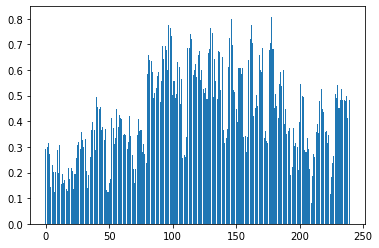

In [ ]:
x_train_fs, x_test_fs, fs = feature_selection(x_train, y_train, x_test, x_train.shape[1])
# print(fs.score_)
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
modelsvm = svm.SVC(kernel='linear')
svmtrain = modelsvm.fit(x_train_fs, y_train)

In [ ]:
x_train_fs.shape, x_test_fs.shape

((405, 40), (174, 40))

In [ ]:
Y_predict = svmtrain.predict(x_test_fs)
print("Prediksi SVM : ",Y_predict)

Prediksi SVM :  ['mature' 'mature' 'mature' 'overripe' 'semimature' 'semimature'
 'semimature' 'overripe' 'inmature' 'mature' 'overripe' 'mature' 'mature'
 'semimature' 'mature' 'overripe' 'semimature' 'semimature' 'inmature'
 'mature' 'mature' 'mature' 'semimature' 'inmature' 'overripe' 'mature'
 'inmature' 'inmature' 'inmature' 'mature' 'inmature' 'overripe'
 'inmature' 'mature' 'mature' 'mature' 'dry' 'overripe' 'mature' 'mature'
 'inmature' 'mature' 'mature' 'semimature' 'dry' 'mature' 'inmature'
 'semimature' 'semimature' 'semimature' 'inmature' 'inmature' 'overripe'
 'mature' 'mature' 'semimature' 'overripe' 'overripe' 'mature' 'inmature'
 'mature' 'inmature' 'inmature' 'mature' 'mature' 'semimature' 'overripe'
 'inmature' 'semimature' 'dry' 'mature' 'overripe' 'inmature' 'dry'
 'semimature' 'semimature' 'mature' 'mature' 'inmature' 'mature'
 'inmature' 'semimature' 'mature' 'semimature' 'inmature' 'mature' 'dry'
 'mature' 'inmature' 'semimature' 'inmature' 'semimature' 'inmature

In [ ]:
accuracy= accuracy_score(y_test, Y_predict)
precision= precision_score(y_test, Y_predict, average='macro')
recall= recall_score(y_test, Y_predict, average='macro')
f1score= f1_score(y_test, Y_predict, average='macro')
print("Akurasi SVM : ",accuracy)
print("Precision SVM : ",precision)
print("Recall SVM : ",recall)
print("F1-Score SVM : ",f1score)

Akurasi SVM :  0.9482758620689655
Precision SVM :  0.9473053235058714
Recall SVM :  0.946190180786955
F1-Score SVM :  0.9467004511073519


In [ ]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

         dry       0.94      0.94      0.94        16
    inmature       0.97      0.97      0.97        35
      mature       0.94      0.96      0.95        52
    overripe       0.94      0.94      0.94        31
  semimature       0.95      0.93      0.94        40

    accuracy                           0.95       174
   macro avg       0.95      0.95      0.95       174
weighted avg       0.95      0.95      0.95       174

